In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer

In [16]:
data=pd.read_csv("Real_fake_news.csv")

In [17]:
data.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'author', 'statement', 'source', 'target',
       'BinaryTarget', 'BinaryNumTarget'],
      dtype='object')

In [20]:
data=data.drop(['Unnamed: 0','Unnamed: 0.1'],axis=1)

In [21]:
data.head()

,author,statement,source,target,BinaryTarget,BinaryNumTarget
0,Jill Terreri,"New York is ""leading the nation with the lowes...",NYS Department of Corrections and Community Su...,True,REAL,1
1,Eleanor Hildebrandt,“Iowa ranks 45th in the U.S. for internet conn...,Cindy Axne,True,REAL,1
2,Emily Zirkelbach,“FUN FACT: West Virginia is home to zero billi...,David Gura,True,REAL,1
3,Madeline Heim,Says gubernatorial candidate Rebecca Kleefisch...,Kelda Helen Roys,True,REAL,1
4,Sabine Martin,"The Biden administration ""published a study co...",Randy Feenstra,True,REAL,1


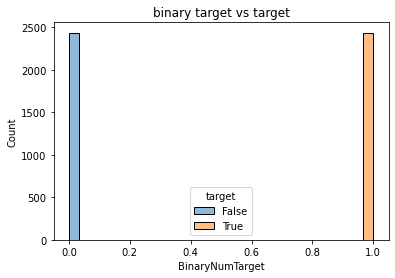

In [53]:
plt.subplot()
sns.histplot(data, x='BinaryNumTarget', bins=30, hue="target").set_title("binary target vs target");


In [36]:
countvectorizer = CountVectorizer(analyzer= 'word', stop_words='english')
tfidfvectorizer = TfidfVectorizer(analyzer='word',stop_words= 'english')

In [38]:
data['source'].value_counts()

Facebook posts          838
Viral image             483
Donald Trump            200
Bloggers                168
Instagram posts         115
                       ... 
Craig Thompson            1
Preserve America PAC      1
Randolph Bracy            1
Ronald Brownstein         1
Lee Merritt               1
Name: source, Length: 1493, dtype: int64

In [51]:
tfidf_source = tfidfvectorizer.fit_transform(data['source'])
tfidf_text = tfidfvectorizer.fit_transform(data['statement'])
tfidf_author = tfidfvectorizer.fit_transform(data['author'])
from scipy.sparse import hstack
data_r = hstack([tfidf_source,tfidf_text,tfidf_author])

In [52]:
data_r.shape

(4870, 11575)

In [54]:
y=data['BinaryNumTarget']
X_train, X_test, y_train, y_test = train_test_split(data_r, y, test_size = 0.2, random_state=0)


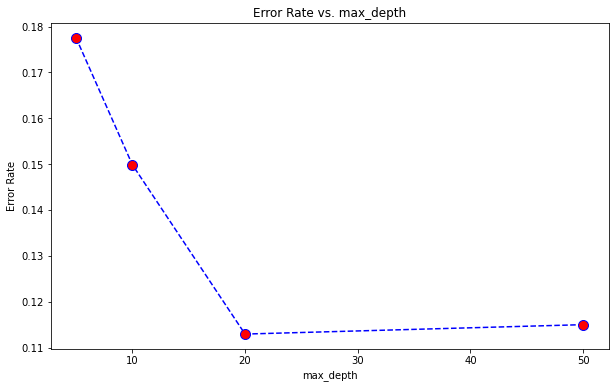

In [55]:
from sklearn.tree import DecisionTreeClassifier
error_rate = []
for i in (3,5,10,20):
 dt = DecisionTreeClassifier(max_depth=i,random_state=42)
 dt.fit(X_train,y_train)
 pred_i = dt.predict(X_test)
 #print (pred_i)
 #print (1-accuracy_score(y_test, pred_i))
 error_rate.append(1-accuracy_score(y_test, pred_i))

plt.figure(figsize=(10,6))
plt.plot((5,10,20,50),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. max_depth')
plt.xlabel('max_depth')
plt.ylabel('Error Rate')
plt.show()

In [56]:
df = DecisionTreeClassifier(max_depth=20,random_state=42)
df.fit(X_train,y_train)
y_pred = df.predict(X_test)
accuracy_score(y_test,y_pred),f1_score(y_test,y_pred)

(0.8850102669404517, 0.8884462151394423)

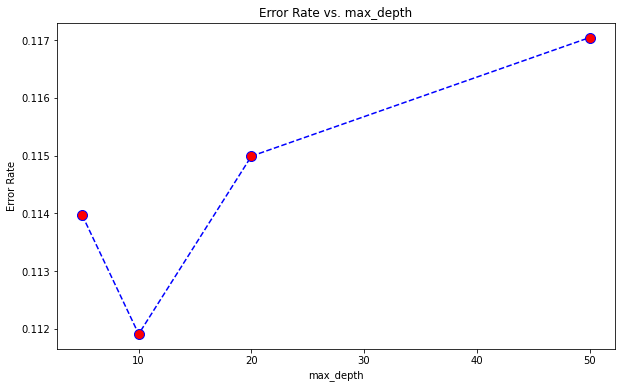

In [57]:
error_rate = []
for i in (3,5,10,20):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 #print (pred_i)
 #print (1-accuracy_score(y_test, pred_i))
 error_rate.append(1-accuracy_score(y_test, pred_i))

plt.figure(figsize=(10,6))
plt.plot((5,10,20,50),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. max_depth')
plt.xlabel('max_depth')
plt.ylabel('Error Rate')
plt.show()

In [58]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
accuracy_score(y_test,y_pred),f1_score(y_test,y_pred)

(0.8850102669404517, 0.8808510638297872)

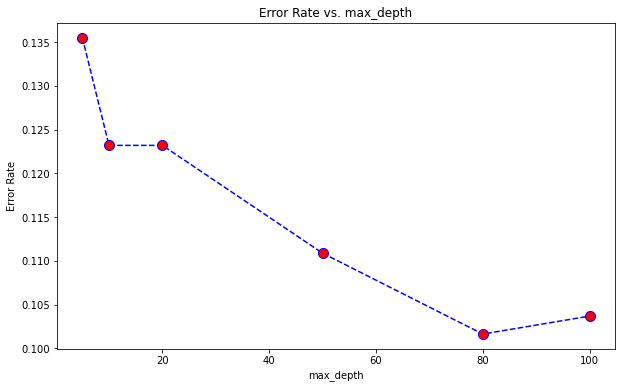

In [63]:
error_rate = []
for i in (5,10,20,50,80,100):
 rf = RandomForestClassifier(max_depth=i,random_state=42)
 rf.fit(X_train,y_train)
 pred_i = rf.predict(X_test)
 #print (pred_i)
 #print (1-accuracy_score(y_test, pred_i))
 error_rate.append(1-accuracy_score(y_test, pred_i))

plt.figure(figsize=(10,6))
plt.plot((5,10,20,50,80,100),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. max_depth')
plt.xlabel('max_depth')
plt.ylabel('Error Rate')
plt.show()

In [64]:
rf = RandomForestClassifier(max_depth=80,random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred),f1_score(y_test,y_pred)

(0.8983572895277208, 0.9016881827209533)

# Based on F1_score and accuracy_score Random Forest Classifier is best  